In [13]:
import numpy as np
from sklearn.svm import SVC
from utilities import *
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier


In [2]:
accept_data_filename= os.path.join(os.path.pardir, "data", "l1calo_hist_EGZ_extended.root")
reject_data_filename= os.path.join(os.path.pardir, "data", "l1calo_hist_ZMUMU_extended.root")
DFs = import_data_files([accept_data_filename, reject_data_filename])

In [3]:

accepted_df = pd.DataFrame({'SuperCell_ET': DFs[0]['SuperCell_ET'], 'offline_ele_pt': DFs[0]['offline_ele_pt'],'Label': 1})
rejected_df = pd.DataFrame({'SuperCell_ET': DFs[1]['SuperCell_ET'], 'offline_ele_pt': DFs[1]['offline_ele_pt'],'Label': 0})
input_df = pd.concat([accepted_df,rejected_df]).reset_index(drop=True)

In [10]:
X_train_all, X_test_all, y_train_pd, y_test_pd = train_test_split(input_df, input_df["Label"], test_size=0.2, random_state=42)

In [ ]:
X_train = ak.to_numpy(X_train_all['SuperCell_ET'])
X_test = ak.to_numpy(X_test_all['SuperCell_ET'])
y_train = y_train_pd.to_numpy()
y_test = y_test_pd.to_numpy()

In [19]:
hinge_sgd_clf = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
hinge_sgd_clf.fit(X_train, y_train)
y_pred_hinge = hinge_sgd_clf.predict(X_test)
evaluate_sklearn_model(y_test, y_pred_hinge)

Accuracy: 0.9425
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95     28610
           1       0.90      0.95      0.93     17572

    accuracy                           0.94     46182
   macro avg       0.94      0.94      0.94     46182
weighted avg       0.94      0.94      0.94     46182

Confusion Matrix:
 [[26770  1840]
 [  814 16758]]
Mean Squared Error:
 0.05746827768394613


In [34]:
X_test_all["pred"] = y_pred_hinge

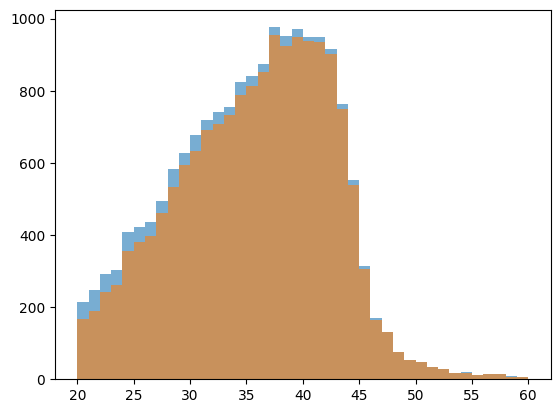

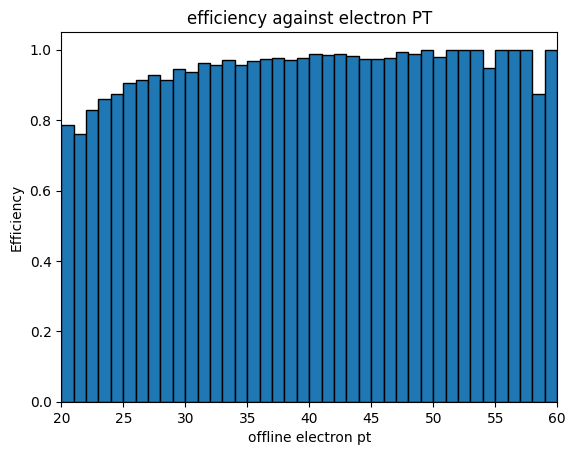

In [58]:
et_Low = 20
et_High = 60
electrons_all,bins,_ = plt.hist( X_test_all.query("Label == 1")["offline_ele_pt"],
                               bins=40,alpha=0.6,range=[et_Low,et_High])
electrons_all_tagged,bins,_ = plt.hist( X_test_all.query("Label == 1 & pred == 1")["offline_ele_pt"],
                               bins=40,alpha=0.6,range=[et_Low,et_High])
plt.show()
electrons_efficiency = electrons_all_tagged/electrons_all

plt.bar(bins[:-1], electrons_efficiency, width = np.diff(bins), align='edge', edgecolor='black')
plt.title('efficiency against electron PT')
plt.xlabel('offline electron pt')
plt.ylabel('Efficiency')
plt.xlim(bins[0], bins[-1])
plt.show()
